# Dragon Real Estate -Price Predictor

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv('data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['AGE'].value_counts()

100.0    43
95.4      4
97.9      4
98.2      4
96.0      4
         ..
47.6      1
64.7      1
34.1      1
58.4      1
84.2      1
Name: AGE, Length: 356, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000195408D0BE0>,
      dtype=object)

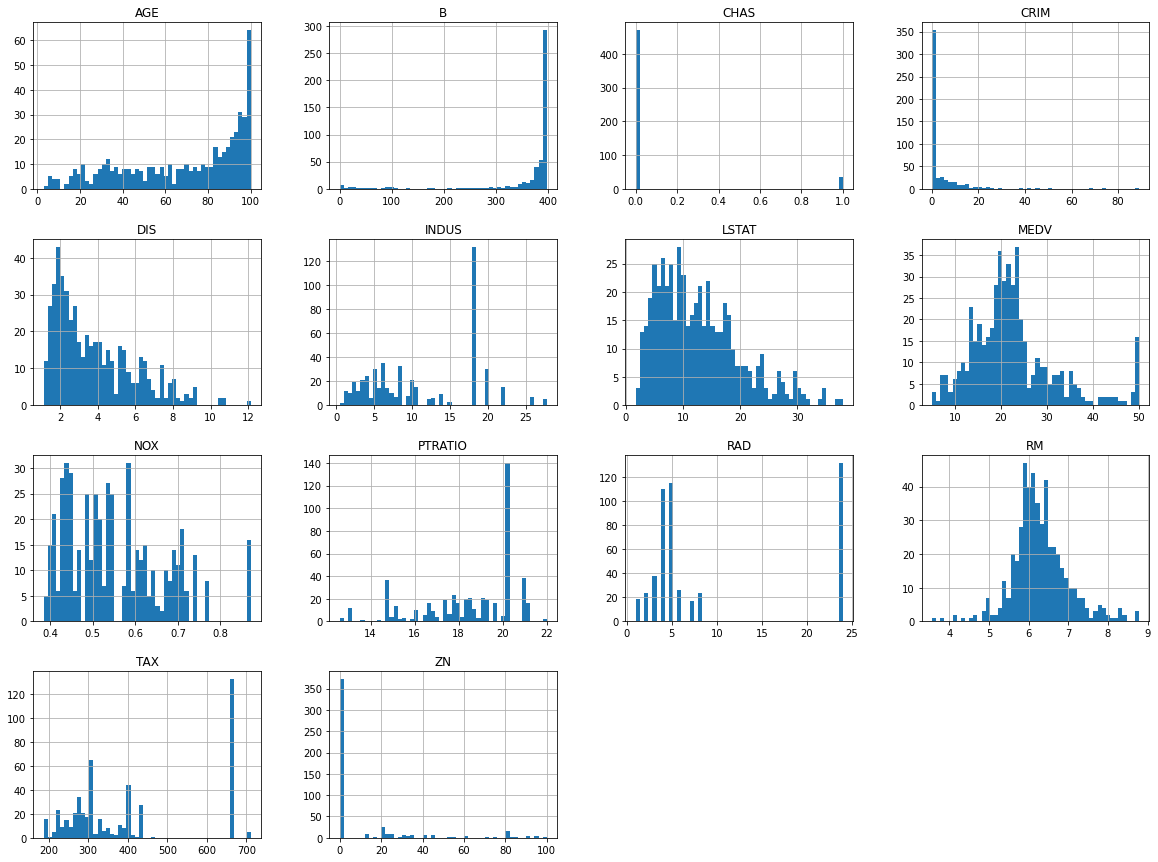

In [9]:
housing.hist(bins=50,figsize=(20,15))

In [10]:
plt.show()

## Train -Test spliting 

In [11]:
# training purpose
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [12]:
#train_set,test_set = split_train_test(housing ,0.2)

In [13]:
#print(f' ROWS of train set {len(train_set)}\nRows of in test set:{len(test_set)}\n')

# train data using sklearn

In [14]:
from sklearn.model_selection import train_test_split 
train_set, test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [15]:
print(f' ROWS of train set {len(train_set)}\nRows of in test set:{len(test_set)}\n')

 ROWS of train set 404
Rows of in test set:101



In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index ,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [17]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,20.9
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6
476,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666,20.2,3.65,17.16,11.7
98,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
455,4.66883,0.0,18.10,0,0.713,5.976,87.9,2.5806,24,666,20.2,10.48,19.01,12.7


In [18]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
176,0.05425,0.0,4.05,0,0.510,6.315,73.4,3.3175,5,296,16.6,395.60,6.29,24.6
284,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,394.72,8.23,22.0
223,0.31533,0.0,6.20,0,0.504,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
87,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
261,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05302,0.0,3.41,0,0.489,7.079,63.1,3.4145,2,270,17.8,396.06,5.70,28.7
466,4.42228,0.0,18.10,0,0.584,6.003,94.5,2.5403,24,666,20.2,331.29,21.32,19.1
52,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243,16.8,396.90,8.43,23.4
504,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [19]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 176 to 356
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     101 non-null    float64
 1   ZN       101 non-null    float64
 2   INDUS    101 non-null    float64
 3   CHAS     101 non-null    int64  
 4   NOX      101 non-null    float64
 5   RM       101 non-null    float64
 6   AGE      101 non-null    float64
 7   DIS      101 non-null    float64
 8   RAD      101 non-null    int64  
 9   TAX      101 non-null    int64  
 10  PTRATIO  101 non-null    float64
 11  B        101 non-null    float64
 12  LSTAT    101 non-null    float64
 13  MEDV     101 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 11.8 KB


In [20]:
strat_test_set['CHAS'].value_counts()

0    94
1     7
Name: CHAS, dtype: int64

In [21]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [22]:
# 94/7

In [23]:
# 376/28


In [24]:
housing=strat_train_set.copy()

# Looking for Correaltions 
# strong postive relations 
# means jya value mule farake padto output madhe

#  Strong_positive coorrection=value increase zali ki output pan incerase hote
# negative correction = value decrase zali ki output pan increase hote

In [25]:
corr_matrix=housing.corr()

In [26]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.660761
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
LSTAT     -0.739129
Name: MEDV, dtype: float64

In [27]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019543182C70>,
      dtype=object)

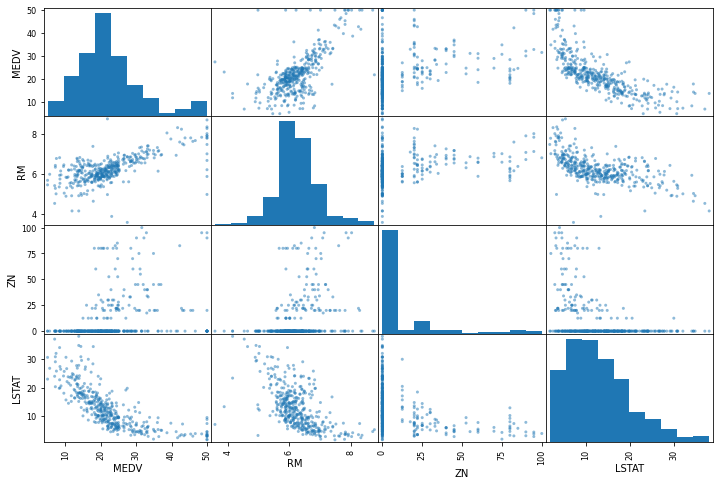

In [28]:
scatter_matrix(housing[attributes],figsize=(12,8))

**LSTAT have high negative coorectionship** #############
**MEDV have RM high postive coorectionship**

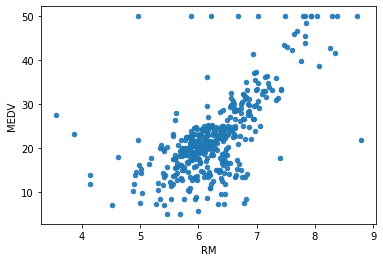

In [29]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.9)

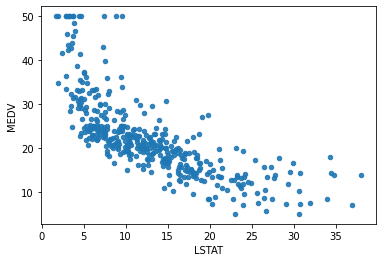

In [30]:
housing.plot(kind="scatter",x="LSTAT",y="MEDV",alpha=0.9)

# clean outlier in graph

# trying Attributes combination

In [31]:
housing["TAXRM"]=housing["TAX"] / housing["RM"]

**meanning od sentance is : tax par room**

In [32]:
housing["TAXRM"]

254     53.607897
348     48.277850
476    125.565611
321     47.508691
326     47.180667
          ...    
154     65.507152
423    119.676550
98      37.216828
455    111.445783
215     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [33]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.660761
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
TAXRM     -0.506534
LSTAT     -0.739129
Name: MEDV, dtype: float64

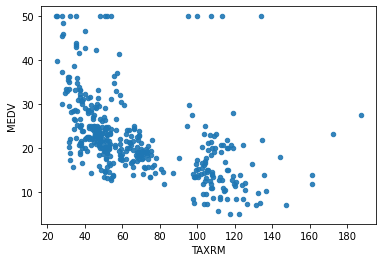

In [34]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.9)

# Separted label and feacture

In [35]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

# Missing Attributes

# To take care of missing attributes,you have three option
# 1. remove a cloumn or rows
# Get rid of missing data points
#  2. Get rid of missing data points
# 3.imp:Set the value to some value(0,mean,median)

In [36]:
#######################################################################################################################

In [37]:
######################################################################################################################


# option 3
step 1:  asssume remove element in " RM"
step2: use meadin formula 
step3: add median to nap  value
1:45


In [38]:
median=housing["RM"].median()

In [39]:
median

6.179

In [40]:
#housing["RM"].fillna(median)

In [41]:
housing.describe()# before count missing value

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.251631,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.688800,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.874750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.179000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.604500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000



**adding median in test set**

In [42]:
from sklearn.impute import SimpleImputer

In [43]:
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [44]:
imputer.statistics_

array([2.9025e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.1790e+00, 7.7500e+01, 3.1675e+00, 5.0000e+00, 3.3600e+02,
       1.9050e+01, 3.9094e+02, 1.1570e+01])

In [45]:
X=imputer.transform(housing)

In [46]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

# ROWS of train set 404
# Rows of in test set:101

In [47]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.251631,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.688800,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.874750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.179000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.604500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# feacture scaling 

## Creating a pipelines 

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    # .......... add as many pipeline  you  want to add
    
    ('std_scaler',StandardScaler())
    ])

In [49]:
housing_num_tr=my_pipeline.fit_transform(housing)


In [50]:
housing_num_tr

array([[-0.44241248,  3.18716752, -1.12581552, ..., -0.99428207,
         0.43852974, -0.49833679],
       [-0.44320015,  1.36098896, -1.47680838, ...,  0.56613801,
         0.38242047, -0.96561983],
       [ 1.3766227 , -0.46518961,  0.99776471, ...,  0.80256529,
        -0.04255723,  1.67953595],
       ...,
       [-0.43839281, -0.46518961, -1.23595972, ..., -0.23771476,
         0.4566363 , -0.92389813],
       [ 0.11992217, -0.46518961,  0.99776471, ...,  0.80256529,
        -3.61123302,  0.85900919],
       [-0.44118424, -0.46518961,  0.37948858, ..., -0.99428207,
         0.41347532,  0.09411135]])

In [51]:
housing_num_tr.shape

(404, 13)

In [52]:
###################################################################################################################

In [53]:
##################################################################################################################

In [54]:
#####################################################################################################################

# Selecting a desired model for Dragon Real Estate

**housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()**

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()

model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [56]:
some_data=housing.iloc[:5]


In [57]:
some_labels=housing_labels.iloc[:5]


In [58]:
some_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89
476,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79


In [59]:
some_labels


254    20.9
348    26.6
476    12.0
321    20.4
326    22.2
Name: MEDV, dtype: float64

In [60]:
prepared_data=my_pipeline.transform(some_data)

In [61]:
model.predict(prepared_data)

array([20.503, 26.676, 12.59 , 20.944, 22.057])

In [62]:
list(some_labels)

[20.9, 26.6, 12.0, 20.4, 22.2]

# Evaluating the model

In [63]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)



In [64]:
rmse

1.204912623675705

# using better evaluation tecnique - cross validation

In [65]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)


In [66]:
rmse_scores

array([3.29061309, 2.42929418, 5.07289377, 2.89349783, 2.89904587,
       2.59072913, 3.04742619, 2.88085615, 2.06983813, 4.33764111])

In [67]:
def print_score(scores):
    print("scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())

In [68]:
print_score(rmse_scores)

scores: [3.29061309 2.42929418 5.07289377 2.89349783 2.89904587 2.59072913
 3.04742619 2.88085615 2.06983813 4.33764111]
Mean: 3.1511835449786774
Standard deviation: 0.8566476211554104


# joblib 

#  SAVING THE MODEL

In [69]:
from joblib import dump ,load

In [70]:
dump(model,'Dragon .joblib')

['Dragon .joblib']

# TESTING a Data

In [71]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [72]:
final_rmse

3.4017557944609296

In [73]:
print(final_predictions,list(Y_test))

[23.101 22.118 46.582 33.066 45.422 34.918 20.357 23.802 33.117 19.742
 19.508 30.639 21.649 33.242 20.233 22.489 12.889 20.625 27.706 19.824
 19.319 45.438 12.022 18.605 25.799 33.193 16.513 15.152  6.823 19.783
 23.606 23.247 17.879 14.744 20.848 18.778 22.599 17.141 44.706 18.286
 20.856 18.559 19.116 18.386 33.283  8.438 24.611 14.561 20.588 21.892
 46.317 23.986 15.09  21.252 19.798 47.026 33.085 19.854 34.799 10.504
 23.845 35.715 33.34  23.765 14.038 20.998 20.683 16.096 27.824 24.667
 23.209 31.736 19.109 31.917 10.241 20.005 41.608 19.466 19.435 15.504
 41.575  9.386 35.44  22.328 27.251 15.88  22.942 22.374 20.329 15.769
 26.326 10.091 33.031 12.962 25.507 20.047 33.659 13.862 21.22  21.34
 20.514] [24.6, 22.0, 44.8, 23.6, 48.8, 36.5, 19.7, 23.1, 34.6, 21.5, 23.1, 15.0, 23.0, 34.9, 18.5, 10.4, 10.2, 18.9, 23.9, 19.3, 19.4, 48.3, 10.9, 19.6, 27.5, 37.3, 16.1, 15.2, 10.5, 21.4, 23.2, 20.7, 21.7, 13.0, 22.3, 19.6, 21.2, 18.1, 50.0, 23.7, 22.6, 20.5, 18.9, 19.5, 32.7, 8.8, 29.1, 

In [74]:
prepared_data[0]

array([-0.44241248,  3.18716752, -1.12581552, -0.27288841, -1.42038605,
       -0.54601796, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
       -0.99428207,  0.43852974, -0.49833679])